# Project Name:

## Netflix Movies And TV Shows Recommendation Using Clustering ML Model.

# Project Summary:

#### This project focuses on analyzing the Netflix dataset to understand the types of content available on the platform as of 2019 and to build a basic recommendation system. The dataset was collected from Flixable, a third-party Netflix search engine. Through exploratory data analysis, we examined trends such as the increasing number of TV shows compared to movies, the most common genres, and content distribution across countries. Word clouds were used to visualize the most frequent words in show and movie descriptions. To find similar content, we used TF-IDF vectorization on text data and applied clustering using KMeans and PCA for visualization. Finally, a content-based recommendation system was developed using cosine similarity, where users can enter the name of a movie or TV show and get suggestions for similar titles. The entire project was done using Python with libraries like Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, and WordCloud.

# Github Link:

### https://github.com/mirza-py/Netflix-Movies-Recommendation-using-Clustering-ML-Model/tree/main

# Problem Statement:

### Netflix has a massive and growing library of shows and movies, making it difficult for users to discover content they might enjoy. The goal of this project is to analyze Netflix's 2019 content dataset to understand trends in content type, genre, and availability, and to develop a recommendation system that helps users find similar shows or movies based on what they like. This involves exploring the data, identifying patterns, processing text descriptions, and using machine learning techniques to recommend similar content.

# General Guidelines:

### This project follows standard data analysis and machine learning practices. The dataset was first cleaned and prepared to handle missing or inconsistent values. Exploratory Data Analysis (EDA) was then performed to understand the structure and patterns within the data. Visualizations were created using libraries like Matplotlib, Seaborn, and WordCloud to make the findings more interpretable. For building the recommendation system, text data was vectorized using TF-IDF, and content similarity was calculated using cosine similarity. The project was implemented entirely in Python, following a step-by-step approach from data understanding to building a functional recommendation system.

# Let's Begin-

In [22]:
#Importing the Libraries
# Basic data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For text processing and clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


from wordcloud import WordCloud



In [23]:
# Load the Netflix dataset
df = pd.read_csv('Netflix_movies_dataset.csv')


In [24]:
# View the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [25]:
# Check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [26]:
# Check missing values
df.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [27]:
# Remove rows where 'type' or 'title' is missing
df.dropna(subset=['type', 'title'], inplace=True)


In [28]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create a new column 'year_added' from the 'date_added'
df['year_added'] = df['date_added'].dt.year


In [29]:
# Fill missing 'country', 'director', 'cast', 'rating', 'duration', 'listed_in' and 'description' with placeholder
columns_to_fill = ['country', 'director', 'cast', 'rating', 'duration', 'listed_in', 'description']
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')


In [30]:
# Check the cleaned data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


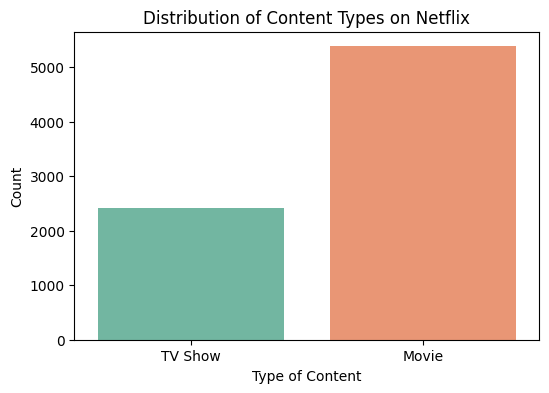

In [31]:
# Count of content type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type',hue='type', palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

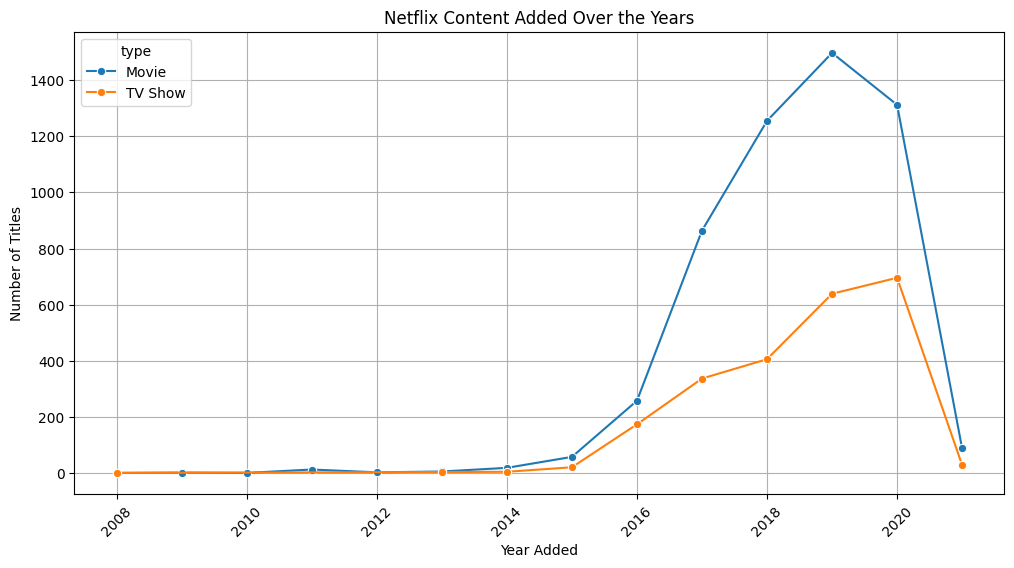

In [32]:
# Group by year and type
yearly_content = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_content, x='year_added', y='count', hue='type', marker='o')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\baigm\AppData\Local\Temp\ipykernel_8576\3622488119.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


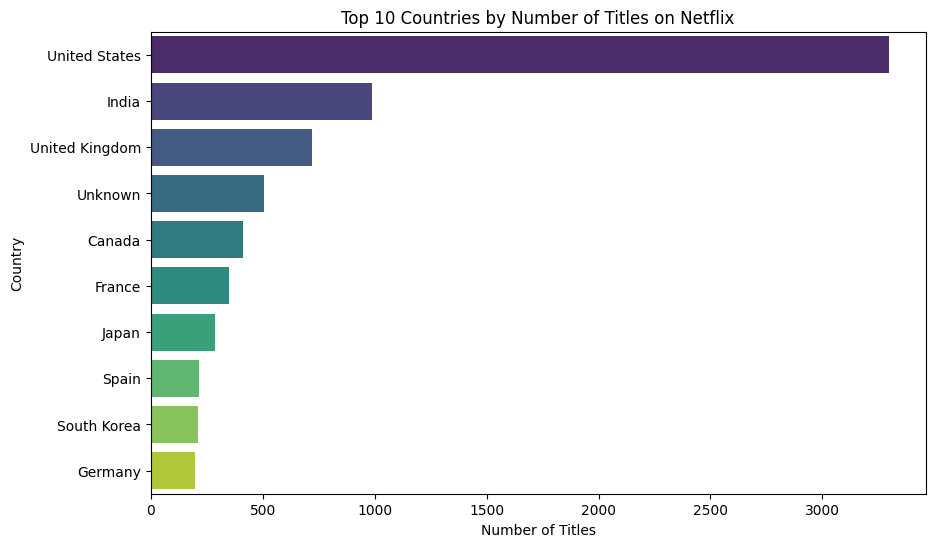

In [33]:
# Split multi-country entries, count appearances
country_split = df['country'].str.split(', ', expand=True).stack()
top_countries = country_split.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


C:\Users\baigm\AppData\Local\Temp\ipykernel_8576\1527762855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


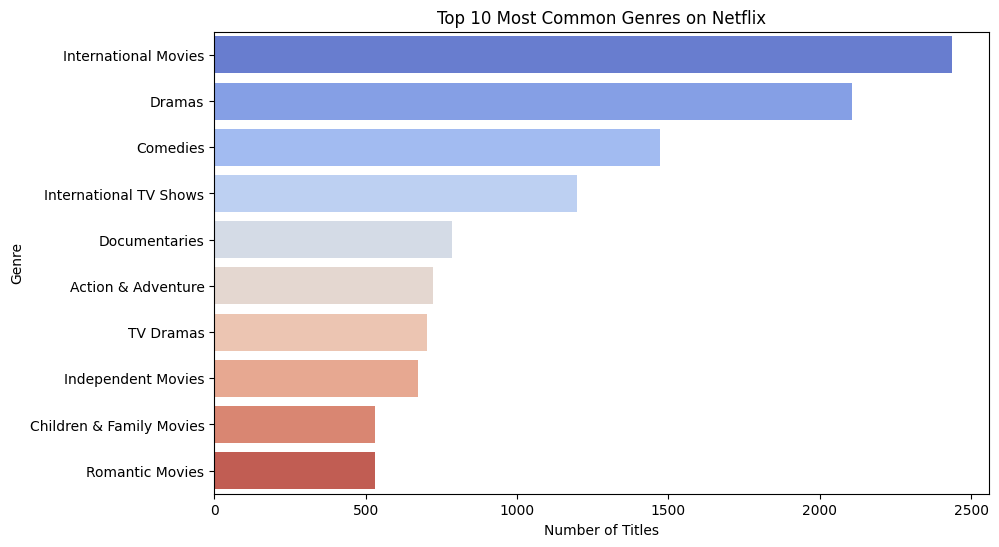

In [34]:
# Split multiple genres per entry
genre_split = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genre_split.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


In [35]:
# Fill any missing text fields with ''
df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['listed_in'].fillna('')


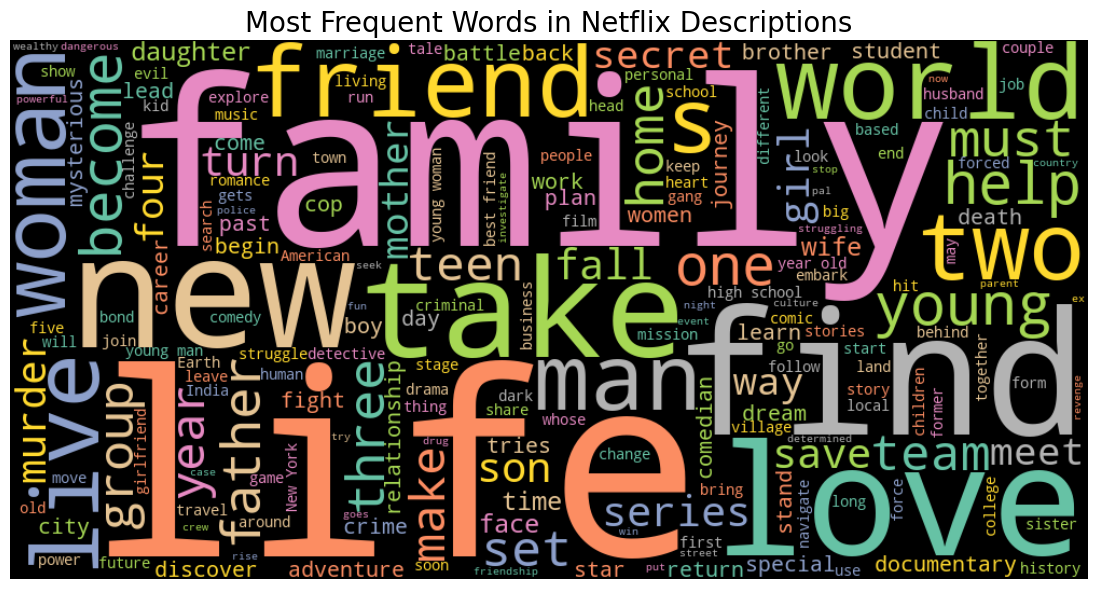

In [36]:
# Combine all descriptions into one text
text = ' '.join(df['description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Set2').generate(text)

# Plot it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Netflix Descriptions', fontsize=20)
plt.show()

In [37]:


# Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['text'])


In [38]:


# Define and fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)


In [39]:

# Reduce to 2 dimensions for plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Add PCA coordinates to DataFrame
df['pca1'] = reduced_data[:, 0]
df['pca2'] = reduced_data[:, 1]


In [40]:
# Function to recommend similar content based on title
def recommend(title, df, tfidf_matrix, top_n=5):
    title = title.lower()
    
    # Match title (case insensitive)
    matches = df[df['title'].str.lower() == title]
    
    if matches.empty:
        print("❌ Title not found. Please check the spelling or try another title.")
        return
    
    idx = matches.index[0]
    
    # Compute similarity scores
    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    
    # Top similar items (excluding itself)
    similar_indices = cosine_sim.argsort()[-(top_n+1):-1][::-1]
    
    print(f"\n🎬 Because you watched **{df.loc[idx, 'title']}**, you might also like:\n")
    for i in similar_indices:
        print(f"✅ {df.loc[i, 'title']} ({df.loc[i, 'type']}) — Genres: {df.loc[i, 'listed_in']}")


In [41]:
# User input
user_title = input("Enter a movie or show title: ")
recommend(user_title, df, tfidf_matrix)


Enter a movie or show title:  sanju



🎬 Because you watched **Sanju**, you might also like:

✅ Azhar (Movie) — Genres: Dramas, International Movies, Sports Movies
✅ The Queen's Gambit (TV Show) — Genres: TV Dramas
✅ Extras (TV Show) — Genres: British TV Shows, TV Comedies
✅ Get In (Movie) — Genres: International Movies, Thrillers
✅ Soldier (Movie) — Genres: Comedies, Dramas, International Movies


# Conclusion:

### In this project, I explored Netflix's 2019 content to understand trends in movies and TV shows. I found that Netflix has shifted focus towards more TV shows over the years, and different countries contribute varying amounts of content. I also built a recommendation system that suggests similar movies and shows based on their descriptions. The system uses text analysis to compare content and recommend similar titles.

### While the system works well, it could be improved by adding ratings or handling misspelled titles. Overall, this project shows how data analysis and machine learning can help make content discovery easier on platforms like Netflix.